# Entregable Data Preparation

In [15]:
#importamos librerías y herramientas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, OrdinalEncoder

## Creamos el Data Frame y lo nombramos _df_bmw_

In [16]:
df_bmw = pd.read_csv("./data/bmw_pricing_v3.csv")

In [17]:
# ESTRUCTURA DE DATOS
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

### Revisamos si hay duplicados para eliminar

In [18]:
df_bmw.duplicated(keep=False).sum()

np.int64(0)

### Comprobamos si hay nulos

In [19]:
df_bmw.isnull().sum()

marca                           970
modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

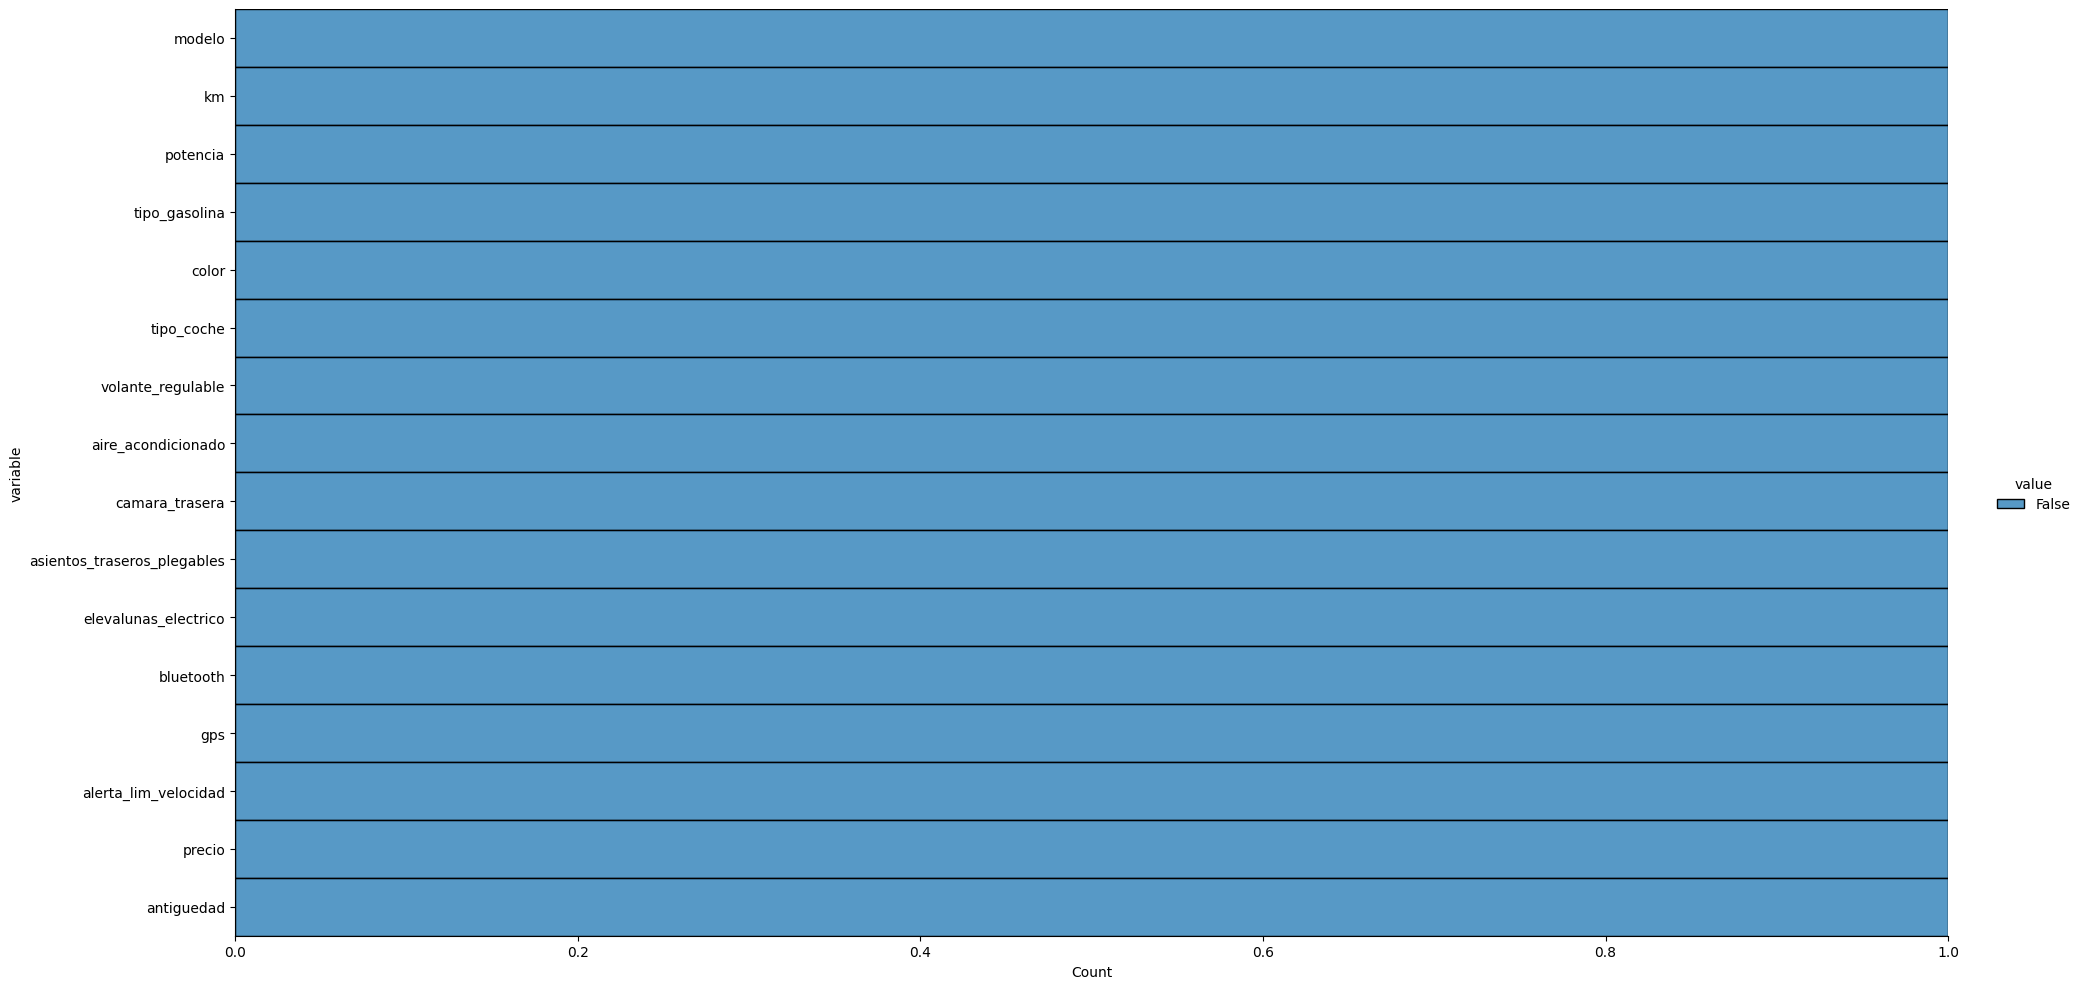

In [100]:
df_bmw.isnull().melt().pipe(lambda df: (sns.displot(
    data=df,
    y='variable',
    hue='value',
    multiple='fill',
    aspect=2,height=10
)));

### eliminamos filas cuya presencia de nulos representan menos del 1%

In [20]:
for i in df_bmw:
    if df_bmw[i].isnull().sum() < 10:
        df_bmw.dropna(subset=[i],inplace=True)
  
df_bmw.isnull().sum()

marca                           965
modelo                            0
km                                0
potencia                          0
fecha_registro                 2409
tipo_gasolina                     0
color                           442
tipo_coche                     1449
volante_regulable                 0
aire_acondicionado              482
camara_trasera                    0
asientos_traseros_plegables    3373
elevalunas_electrico              0
bluetooth                       725
gps                               0
alerta_lim_velocidad            725
precio                            0
fecha_venta                       0
dtype: int64

### hecho esto analizaremos variable por variable

In [21]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4817 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3852 non-null   object 
 1   modelo                       4817 non-null   object 
 2   km                           4817 non-null   float64
 3   potencia                     4817 non-null   float64
 4   fecha_registro               2408 non-null   object 
 5   tipo_gasolina                4817 non-null   object 
 6   color                        4375 non-null   object 
 7   tipo_coche                   3368 non-null   object 
 8   volante_regulable            4817 non-null   object 
 9   aire_acondicionado           4335 non-null   object 
 10  camara_trasera               4817 non-null   object 
 11  asientos_traseros_plegables  1444 non-null   object 
 12  elevalunas_electrico         4817 non-null   object 
 13  bluetooth              

### Variable **Marca**
Observamos que tiene solo dos únicos valores y como sabemos que el dataset es de BMW, los nulos lo completamos con la moda y/o la misma marca. Al tratarse de toda la columna el mismo valor, decidimos eliminarla.

In [22]:
df_bmw["marca"].unique()

array([nan, 'BMW'], dtype=object)

In [23]:
del(df_bmw['marca'])

### Variable **Color**
Observamos su distribución con _normalize_ y lo reemplazamos los nulos con la moda

In [24]:
df_bmw["color"].unique()

array(['black', 'grey', 'white', 'red', 'silver', 'blue', nan, 'orange',
       'beige', 'brown', 'green'], dtype=object)

In [25]:
df_bmw["color"].value_counts(normalize=True)

color
black     0.340343
grey      0.243886
blue      0.146971
white     0.109714
brown     0.069029
silver    0.066286
red       0.010743
beige     0.008457
green     0.003200
orange    0.001371
Name: proportion, dtype: float64

In [26]:

df_bmw['color'].fillna(df_bmw['color'].mode()[0], inplace=True)

C:\Users\rafas\AppData\Local\Temp\ipykernel_3580\3000990387.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bmw['color'].fillna(df_bmw['color'].mode()[0], inplace=True)


### Variable **tipo_coche**
Reemplazamos los nulos con _sin tipo_

In [27]:
df_bmw[["tipo_coche"]]

,tipo_coche
0,NaN
1,convertible
2,NaN
3,convertible
4,NaN
...,...
4838,NaN
4839,NaN
4840,van
4841,van


In [28]:
df_bmw['tipo_coche'].fillna('sin tipo', inplace=True)

C:\Users\rafas\AppData\Local\Temp\ipykernel_3580\1102255687.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bmw['tipo_coche'].fillna('sin tipo', inplace=True)


### Variable **aire_acondicionado**

In [29]:
df_bmw['aire_acondicionado'].unique() #Evaluamos luego

array([True, False, nan], dtype=object)

### Variable **asientos_traseros_plegables**

In [30]:
df_bmw[df_bmw["asientos_traseros_plegables"]==True]["modelo"]

60                   435
111                  420
118       430 Gran Coupé
150       430 Gran Coupé
290                  530
              ...       
4775                  X1
4780                  X1
4783                  X3
4793                X5 M
4817    320 Gran Turismo
Name: modelo, Length: 301, dtype: object

### creamos una lista con los modelos que tienen asientos plegables

In [31]:

modelos_con_asientos_plegables = df_bmw[df_bmw["asientos_traseros_plegables"] == True]["modelo"]

### rellenar los valores nulos en la columna asientos_plegables con True de todos los modelos de la lista

In [32]:

df_bmw.loc[df_bmw["modelo"].isin(modelos_con_asientos_plegables) & df_bmw["asientos_traseros_plegables"].isnull(), "asientos_traseros_plegables"] = True

### de igual forma análoga lo hacemos para los que son False

In [33]:
modelos_sin_asientos_plegables = df_bmw[df_bmw["asientos_traseros_plegables"] == False]["modelo"]


In [34]:
df_bmw.loc[df_bmw["modelo"].isin(modelos_sin_asientos_plegables) & df_bmw["asientos_traseros_plegables"].isnull(), "asientos_traseros_plegables"] = False

In [35]:
df_bmw["asientos_traseros_plegables"].isnull().sum()

np.int64(17)

### eliminamos las filas nulas


In [36]:
df_bmw.dropna(subset=["asientos_traseros_plegables"],inplace=True)

### Variable **bluetooth**

In [37]:
df_bmw['bluetooth'].isnull().sum()

np.int64(724)

In [38]:
df_bmw["bluetooth"].value_counts()

bluetooth
False    3091
True      985
Name: count, dtype: int64

### operamos igual que con asientos traseros plegables, pero dando prioridad a False ya que es el valor que mas se repite...sería como aplicar la moda, pero dejando espacio para rellanar algunos nulos con True, si es que queda alguno.

In [39]:
sin_bluetooth =df_bmw[df_bmw["bluetooth"]==False]["modelo"]

In [40]:
df_bmw.loc[df_bmw["modelo"].isin(sin_bluetooth) & df_bmw["bluetooth"].isnull(), "bluetooth"] = False

In [41]:
con_bluetooth =df_bmw[df_bmw["bluetooth"]==True]["modelo"]

In [42]:
df_bmw.loc[df_bmw["modelo"].isin(con_bluetooth) & df_bmw["bluetooth"].isnull(), "bluetooth"] = True

In [43]:
df_bmw["bluetooth"].isnull().sum()

np.int64(0)

In [44]:
df_bmw["bluetooth"].value_counts()

bluetooth
False    3808
True      992
Name: count, dtype: int64

### Variable **alerta_lim_velocidad**

In [68]:
df_bmw['alerta_lim_velocidad'].value_counts()  # evaluamos luego

alerta_lim_velocidad
True     2937
False    1863
Name: count, dtype: int64

In [63]:
con_alerta = df_bmw[df_bmw["alerta_lim_velocidad"]==True & df_bmw["fecha_registro"].notnull()]["modelo"]

In [56]:
con_alerta

5                     335
8                      Z4
9                     320
13                    420
16                    220
              ...        
4837      218 Gran Tourer
4838      218 Gran Tourer
4839    218 Active Tourer
4840      218 Gran Tourer
4841    218 Active Tourer
Name: modelo, Length: 2066, dtype: object

In [64]:
df_bmw.loc[df_bmw["modelo"].isin(con_alerta) & df_bmw["alerta_lim_velocidad"].isnull(), "alerta_lim_velocidad"] = True

In [67]:
df_bmw["alerta_lim_velocidad"].fillna(False, inplace=True)

C:\Users\rafas\AppData\Local\Temp\ipykernel_3580\354760519.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bmw["alerta_lim_velocidad"].fillna(False, inplace=True)
C:\Users\rafas\AppData\Local\Temp\ipykernel_3580\354760519.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bmw["alerta_lim_velocidad"].

###  cambiamos el formato de fechas.

In [69]:
df_bmw['fecha_registro']=pd.to_datetime(df_bmw['fecha_registro'])
df_bmw['fecha_venta']=pd.to_datetime(df_bmw['fecha_venta'])

### Creamos una nueva columna "Antiguedad" en años.

In [70]:
df_bmw["antiguedad"]= round((df_bmw["fecha_venta"]-df_bmw["fecha_registro"])/ np.timedelta64(1,'m'))/(1440*365)

In [72]:
df_bmw["antiguedad"].isnull().sum()

np.int64(2403)

### calculamos la moda global de antiguedad 


In [73]:
moda_global = df_bmw["antiguedad"].mode()[0]

### rellenamos con la moda de cada modelo y si no tiene moda le aplicamos la global

In [74]:
df_bmw['antiguedad'] = df_bmw.groupby('modelo')['antiguedad'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else moda_global))

In [75]:
df_bmw['antiguedad'].isnull().sum()

np.int64(0)

### Observamos nuestra nueva variable mediante un describe y nos damos cuenta que contiene valores negativos, lo cual no es posible. 


In [78]:
df_bmw["antiguedad"].describe()

count    4800.000000
mean        4.863174
std         2.000639
min        -5.504110
25%         4.002740
50%         4.416438
75%         5.002740
max        28.104110
Name: antiguedad, dtype: float64

In [79]:
df_bmw.drop(df_bmw[df_bmw["antiguedad"]<0].index, axis=0, inplace=True)

In [80]:
df_bmw

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,antiguedad
0,118,140411.0,100.0,2012-02-01,diesel,black,sin tipo,True,True,False,False,True,False,True,True,11300.0,2018-01-01,5.920548
2,320,183297.0,120.0,2012-04-01,diesel,white,sin tipo,False,False,False,True,True,False,True,False,10200.0,2018-02-01,5.841096
3,420,128035.0,135.0,NaT,diesel,red,convertible,True,True,False,True,True,True,True,True,25100.0,2018-02-01,3.917808
4,425,97097.0,160.0,NaT,diesel,silver,sin tipo,True,True,False,False,False,True,True,True,33400.0,2018-04-01,4.002740
5,335,152352.0,225.0,2011-05-01,petrol,black,sin tipo,True,True,False,False,True,True,True,True,17100.0,2018-02-01,6.761644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,218 Gran Tourer,39743.0,110.0,NaT,diesel,black,sin tipo,False,True,False,False,False,False,True,False,14600.0,2018-08-01,2.501370
4839,218 Active Tourer,49832.0,100.0,2015-06-01,diesel,grey,sin tipo,False,True,False,False,False,False,True,True,17500.0,2018-08-01,3.169863
4840,218 Gran Tourer,19633.0,110.0,2015-10-01,diesel,grey,van,False,True,False,False,False,False,True,True,17000.0,2018-09-01,2.920548
4841,218 Active Tourer,27920.0,110.0,2016-04-01,diesel,brown,van,True,True,False,False,False,False,True,True,22700.0,2018-09-01,2.419178


### exploro los valores nulos que me quedan 

In [101]:
df_bmw.isnull().sum()

modelo                         0
km                             0
potencia                       0
tipo_gasolina                  0
color                          0
tipo_coche                     0
volante_regulable              0
aire_acondicionado             0
camara_trasera                 0
asientos_traseros_plegables    0
elevalunas_electrico           0
bluetooth                      0
gps                            0
alerta_lim_velocidad           0
precio                         0
antiguedad                     0
dtype: int64

### decidimos eliminar fecha de registro y fecha de venta porque ya tenemos la columna antigüedad que engloba a ambas features

In [82]:
df_bmw.drop(["fecha_venta","fecha_registro"], axis=1, inplace=True)

### exploramos aire acondicionado e inputamos nulos 


In [84]:
df_bmw["aire_acondicionado"].value_counts()

aire_acondicionado
True     3435
False     885
Name: count, dtype: int64

In [97]:
df_bmw[(df_bmw['aire_acondicionado'].isnull()) ]["modelo"].unique()

array(['420', '220', 'Z4', '118', '435 Gran Coupé', '320', '335', '218',
       '640', '318', '316', '520', '525', '530', '535', '518', '330',
       'M550', '120', '116', '420 Gran Coupé', '520 Gran Turismo', 'i3',
       '318 Gran Turismo', '114', '125', '418 Gran Coupé',
       '320 Gran Turismo', '123', '325 Gran Turismo', '740', '730',
       '640 Gran Coupé', 'X1', 'X3', 'X6', 'X5', 'X6 M', 'X4', 'X5 M',
       '218 Active Tourer', '218 Gran Tourer'], dtype=object)

### vemos que la mayoria de vehiculos son modernos posteriores al año 2000,  donde ya los vehiculos de alta gama todos traen aire acondicionado de serie. por lo que inputamos la moda

In [98]:
df_bmw["aire_acondicionado"].fillna(df_bmw["aire_acondicionado"].mode()[0], inplace=True)

C:\Users\rafas\AppData\Local\Temp\ipykernel_3580\3794903880.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bmw["aire_acondicionado"].fillna(df_bmw["aire_acondicionado"].mode()[0], inplace=True)
C:\Users\rafas\AppData\Local\Temp\ipykernel_3580\3794903880.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


## una vez hemos inputado todos los nulos ahora vemos de nuevo todos los duplicados para asegurarnos que al inputar nulos no apareció ninguno

In [102]:
df_bmw.duplicated().sum()

np.int64(0)

### ahora mediante graficos analizamos todas las variables, teniendo en cuenta que nuestra variable a predecir es "precio"

Descriptive statistics of dataset:
                 km     potencia         precio   antiguedad
count  4.798000e+03  4798.000000    4798.000000  4798.000000
mean   1.410430e+05   128.731763   15802.209254     4.866696
std    6.011635e+04    38.391741    9139.494284     1.993216
min   -6.400000e+01     0.000000     100.000000     0.589041
25%    1.030672e+05   100.000000   10900.000000     4.002740
50%    1.410655e+05   120.000000   14200.000000     4.416438
75%    1.752478e+05   135.000000   18600.000000     5.002740
max    1.000376e+06   423.000000  178500.000000    28.104110


<Figure size 1600x1000 with 0 Axes>

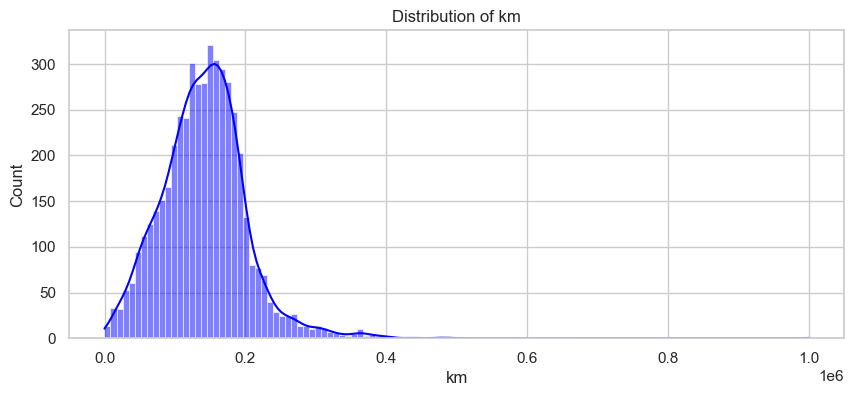

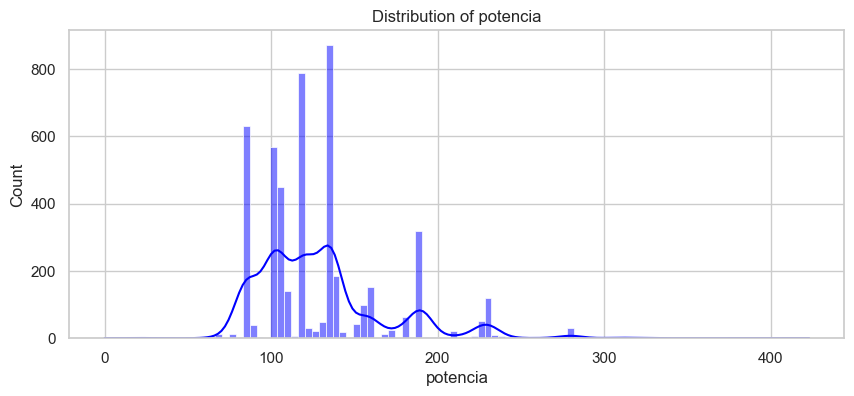

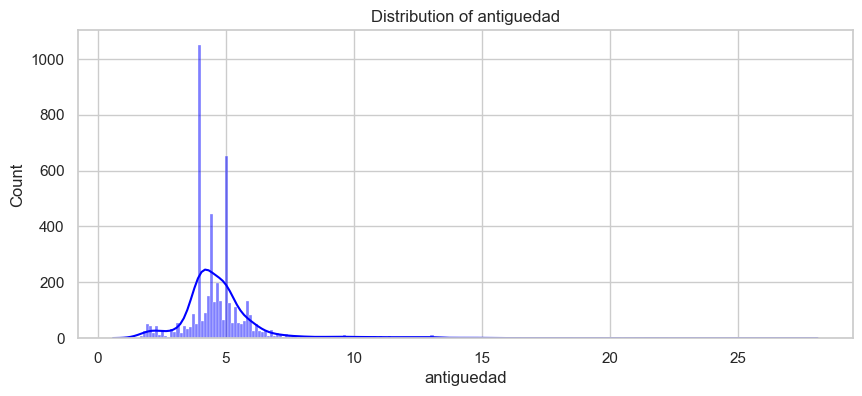

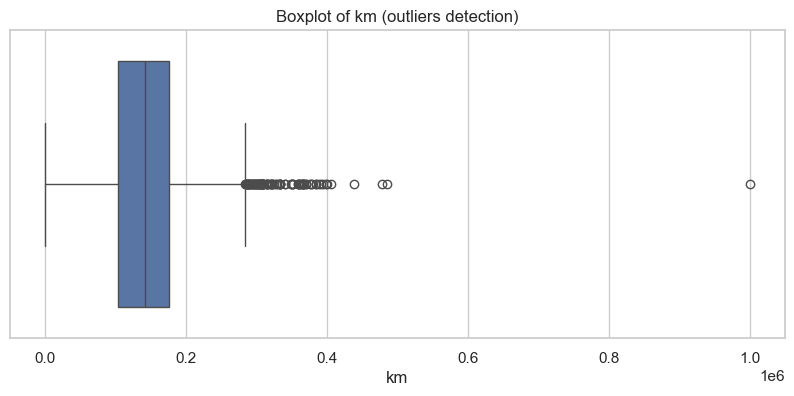

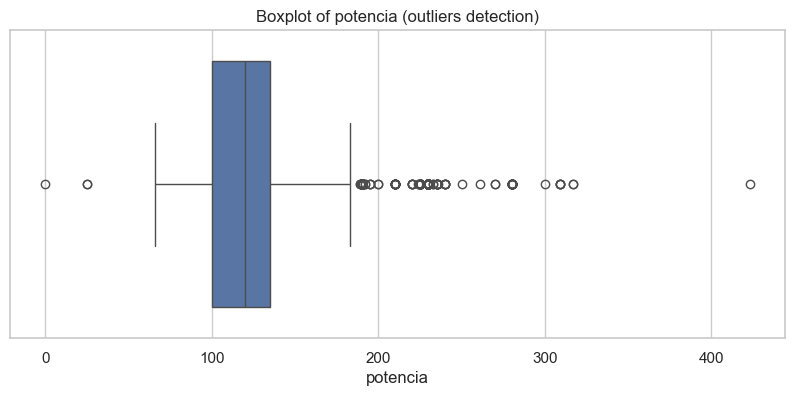

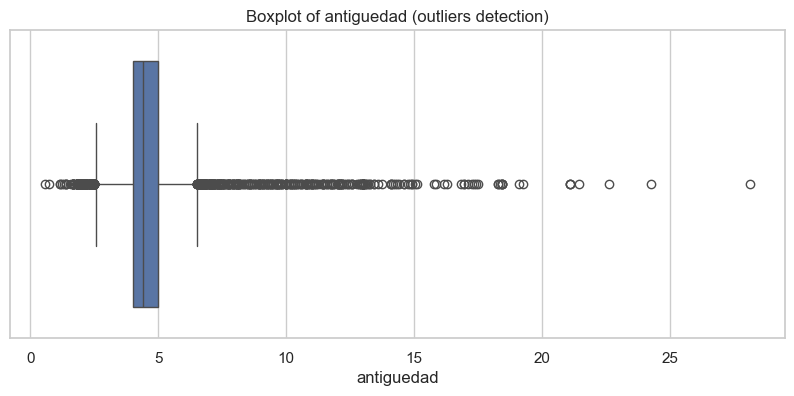

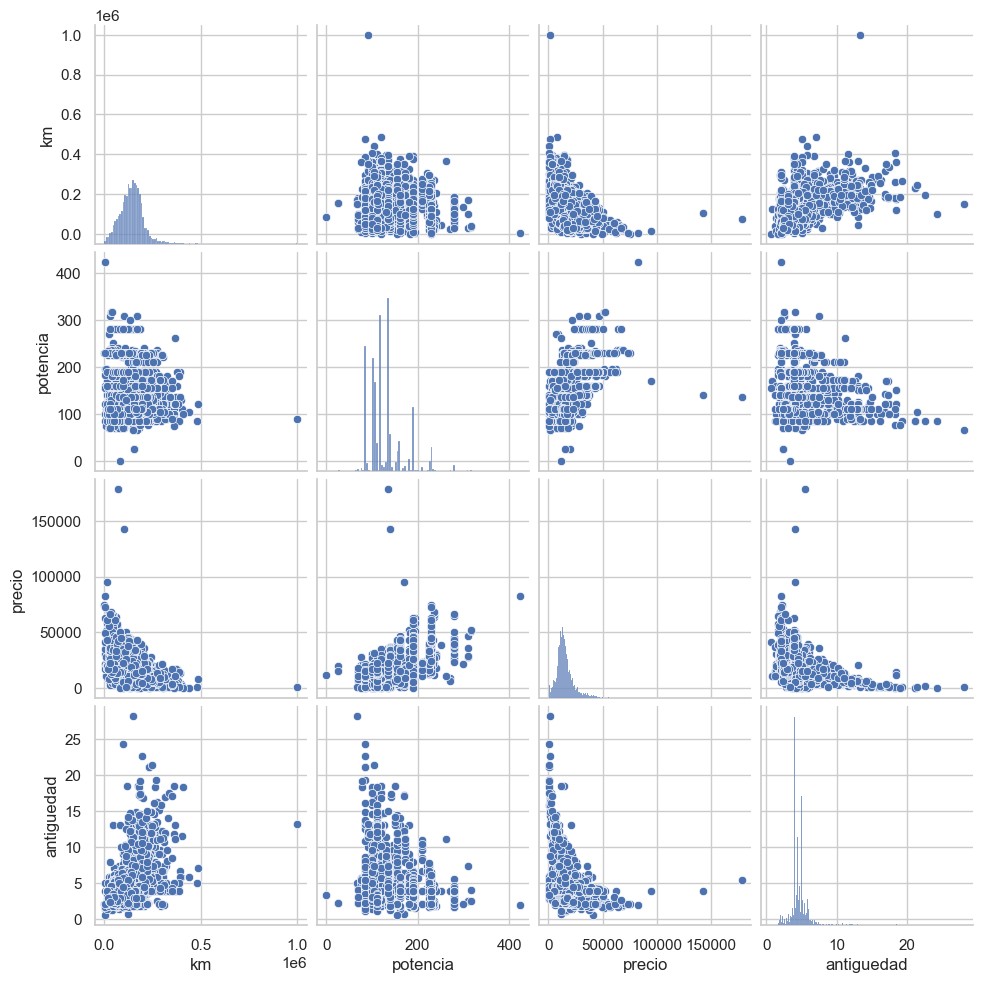

ValueError: could not convert string to float: 'Z4'

<Figure size 1200x800 with 0 Axes>

In [104]:
def eda_visualizations(df):
    """
    Generate standard EDA visualizations for the dataset.
    
    Parameters:
    df (DataFrame): DataFrame to analyze.
    """
    # Set general styling
    sns.set(style="whitegrid")
    plt.figure(figsize=(16, 10))

    # Descriptive statistics
    print("Descriptive statistics of dataset:")
    print(df.describe())

    # Distribution of numerical variables
    for col in df.select_dtypes(include=[np.number]).columns:
        if col != 'precio':  # Excluimos la variable 'precio' por ahora
            plt.figure(figsize=(10, 4))
            sns.histplot(df[col], kde=True, color='blue')
            plt.title(f'Distribution of {col}')
            plt.show()

    # Boxplots to detect outliers
    for col in df.select_dtypes(include=[np.number]).columns:
        if col != 'precio':
            plt.figure(figsize=(10, 4))
            sns.boxplot(x=df[col])
            plt.title(f'Boxplot of {col} (outliers detection)')
            plt.show()

    # Pairplot for numerical variables
    sns.pairplot(df.select_dtypes(include=[np.number]))
    plt.show()

    # Correlation matrix (heatmap)
    plt.figure(figsize=(12, 8))
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.show()

    # Scatter plots for potential outliers and negative/positive values vs target (precio)
    for col in df.select_dtypes(include=[np.number]).columns:
        if col != 'precio':  # exclude target variable if exists
            plt.figure(figsize=(10, 4))
            sns.scatterplot(x=df[col], y=df['precio'], hue=df['precio'], palette='cool')
            plt.title(f'Scatterplot of {col} vs precio')
            plt.show()

    # Plotly interactive boxplots (optional)
    for col in df.select_dtypes(include=[np.number]).columns:
        fig = px.box(df, y=col, title=f"Interactive Boxplot of {col}")
        fig.show()

# Llamada a la función con tu dataset
eda_visualizations(df_bmw)

### Variable Km

In [249]:
#Observamos que existe valor menos a "0", procedemos a eliminar
df_bmw5.drop(df_bmw5[df_bmw5['km']<0].index, inplace=True)

### Variable Potencia

In [250]:
#Observamos que existe valor igual a "0", procedemos a eliminar
df_bmw5.drop(df_bmw5[df_bmw5['potencia']==0].index, inplace=True)

### Variable tipo_gasolina

In [251]:
# Renombramos "tipo gasolina" a "combustible"
df_bmw5.rename(columns={'tipo_gasolina': 'combustible'}, inplace=True)
# Vemos los valores unicos en tipo de gasolina y observamos error en tipeo dentro de los tipos
df_bmw5['combustible'].unique()
# Estandarizamos los nombre de tipos a minuscula
df_bmw5['combustible']=df_bmw5['combustible'].str.lower()

In [252]:
#hacemos copia
df_bmw6 = df_bmw5.copy()

### Volvemos a las variables Booleanas

In [253]:
# Preparamos una función que determine la proporción de cada variable_booleanas
def calcular_proporcion_booleanos(df, columna):
    """
    Calcula la proporción de valores booleanos en una columna de un DataFrame.

    Parámetros:
        - df: DataFrame de pandas.
        - columna: Nombre de la columna que se va a analizar.

    Retorna:
        La proporción de valores True y False en la columna especificada.
    """
    conteo_booleanos = df[columna].value_counts(normalize=True)
    proporcion_true = conteo_booleanos.get(True, 0) * 100
    proporcion_false = conteo_booleanos.get(False, 0) * 100
    return proporcion_true, proporcion_false


# Calcular la proporción de valores booleanos en la columna 'aire_acondicionado'
proporcion_true_EE, proporcion_false_EE= calcular_proporcion_booleanos(df_bmw6, 'aire_acondicionado')
proporcion_true_bluetooth,proporcion_false_bluetooth= calcular_proporcion_booleanos(df_bmw6, 'bluetooth')
proporcion_true_alerta_lim_velocidad, proporcion_false_alerta_lim_velocidad= calcular_proporcion_booleanos(df_bmw6, 'alerta_lim_velocidad')

### Preparamos funcion para rellenar nulos en columnas designadas con proporciones de True y False

In [254]:
def rellenar_nulos_con_proporciones(df, proporciones_true, proporciones_false):
    """
    Rellena los valores nulos en las columnas específicas de un DataFrame con proporciones de True y False.

    Parámetros:
        - df: DataFrame de pandas.
        - proporciones_true: Diccionario que mapea el nombre de la columna a su proporción de True.
        - proporciones_false: Diccionario que mapea el nombre de la columna a su proporción de False.

    Retorna:
        El DataFrame con los valores nulos rellenados según las proporciones especificadas.
    """
    for columna, proporcion_true in proporciones_true.items():
        proporcion_false = proporciones_false[columna]
        num_nulos = df[columna].isnull().sum()
        num_true = round(num_nulos * proporcion_true)
        num_false = num_nulos - num_true
        valores = [True] * num_true + [False] * num_false
        np.random.shuffle(valores)
        valores_serie = pd.Series(valores, index=df.index[df[columna].isnull()])
        df[columna].fillna(valores_serie, inplace=True)

    return df

# Diccionarios de proporciones de True y False
proporciones_true = {
    'aire_acondicionado': 0.8056,
    'bluetooth': 0.2449,
    'alerta_lim_velocidad': 0.5487
}

proporciones_false = {
    'aire_acondicionado': 1 - proporciones_true['aire_acondicionado'],
    'bluetooth': 1 - proporciones_true['bluetooth'],
    'alerta_lim_velocidad': 1 - proporciones_true['alerta_lim_velocidad']
}

# Utilizar la función para rellenar los valores nulos en las columnas con las proporciones correspondientes
df_bmw6 = rellenar_nulos_con_proporciones(df_bmw6, proporciones_true, proporciones_false)

C:\Users\harol\AppData\Local\Temp\ipykernel_18696\2693508799.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[columna].fillna(valores_serie, inplace=True)
C:\Users\harol\AppData\Local\Temp\ipykernel_18696\2693508799.py:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columna].fillna(valores_serie, in

In [255]:
# hacemos un info para ver como van nuestros datos.
df_bmw6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4813 entries, 0 to 4842
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   modelo                4813 non-null   object        
 1   km                    4813 non-null   float64       
 2   potencia              4813 non-null   float64       
 3   fecha_registro        2405 non-null   datetime64[ns]
 4   combustible           4813 non-null   object        
 5   color                 4813 non-null   object        
 6   tipo_coche            4813 non-null   object        
 7   volante_regulable     4813 non-null   object        
 8   aire_acondicionado    4813 non-null   bool          
 9   camara_trasera        4813 non-null   object        
 10  elevalunas_electrico  4813 non-null   object        
 11  bluetooth             4813 non-null   bool          
 12  gps                   4813 non-null   bool          
 13  alerta_lim_velocidad  4

### Observamos que hay variables de tipo Objeto que son booleanas y las casteamos

In [256]:
#Añadimos la columna con tipo booleana
list_to_cast=['volante_regulable','camara_trasera','elevalunas_electrico']
for i in list_to_cast:
  df_bmw6[i] = df_bmw6[i].astype(bool)

In [257]:
df_bmw6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4813 entries, 0 to 4842
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   modelo                4813 non-null   object        
 1   km                    4813 non-null   float64       
 2   potencia              4813 non-null   float64       
 3   fecha_registro        2405 non-null   datetime64[ns]
 4   combustible           4813 non-null   object        
 5   color                 4813 non-null   object        
 6   tipo_coche            4813 non-null   object        
 7   volante_regulable     4813 non-null   bool          
 8   aire_acondicionado    4813 non-null   bool          
 9   camara_trasera        4813 non-null   bool          
 10  elevalunas_electrico  4813 non-null   bool          
 11  bluetooth             4813 non-null   bool          
 12  gps                   4813 non-null   bool          
 13  alerta_lim_velocidad  4

### Como hemos creado la columna "antiguedad", procedemos a borrar "fecha_registro" y "fecha_venta"

In [258]:
list_to_delete = ['fecha_registro','fecha_venta']
for i in list_to_delete:
  del(df_bmw6[i])

### Siguiendo con el análisis univariable y después de revisar el detalle de la variable modelo, observamos grupos que pertenecen a un cierto tipo_coche, los validamos y aseguramos los evidentes, trabajo sobre una copia nueva

In [259]:
df_bmw6['tipo_coche'].value_counts()

tipo_coche
sin tipo       1448
estate         1096
sedan           820
suv             753
hatchback       488
subcompact       77
coupe            73
convertible      30
van              28
Name: count, dtype: int64

In [260]:
df_bmw7= df_bmw6.copy()

In [261]:
#Capturo los modelos que inicien con "X"
models_to_suv =[]
for i in df_bmw7['modelo'].unique():
  if ((i[0]=='X') & (len(i)==2)):
    #print(i)
    models_to_suv.append(i)

models_to_suv

['X3', 'X5', 'X1', 'X4', 'X6']

In [262]:
#Me aseguro que todos los modelos que inicien con "X" son suv
for i in models_to_suv:
  df_bmw7.loc[df_bmw7[(df_bmw7['modelo']==i)].index,'tipo_coche']="suv"

In [263]:
#Todos los modelos que contengan el término "tourer" son van
models_to_tourer =[]
for i in df_bmw7['modelo'].unique():
  if (i.find('Tourer')!=-1):
    #print(i)
    models_to_tourer.append(i)

#models_to_tourer
for i in models_to_tourer:
  df_bmw7.loc[df_bmw7[(df_bmw7['modelo']==i)].index,'tipo_coche']="van"

In [264]:
#Todos los modelo que contengan el término "coupe" son coupe
models_to_coupe =[]
for i in df_bmw7['modelo'].unique():
  if (i.find('Coupé')!=-1):
    #print(i)
    models_to_coupe.append(i)

#models_to_coupe
for i in models_to_coupe:
  df_bmw7.loc[df_bmw7[(df_bmw7['modelo']==i)].index,'tipo_coche']="coupe"

### Decidimos asignar modelos dentro de una nueva columna serie en particular, para esto reconocemos que cada serie engloba cierto tipo de modelos

In [265]:
df_bmw7['modelo'].unique()

array(['118', 'M4', '320', '420', '425', '335', '325', 'Z4', '120', '220',
       '650', '135', '218', '318', '430', 'M3', '330', '225', 'M235',
       '316', '435', '640', '640 Gran Coupé', '435 Gran Coupé', 'i8',
       '630', '430 Gran Coupé', '635', '520', '525', '530', '535',
       '320 Gran Turismo', '518', '116', '328', '523', 'X3', 'M550',
       '528', '325 Gran Turismo', '125', '318 Gran Turismo',
       '420 Gran Coupé', 'i3', '114', '520 Gran Turismo',
       '530 Gran Turismo', 'M135', '418 Gran Coupé', '330 Gran Turismo',
       '335 Gran Turismo', '730', '123', '535 Gran Turismo', '740', '750',
       'ActiveHybrid 5', '735', 'M5', 'X5', 'X1', 'X4', 'X6', 'X6 M',
       'X5 M', 'X5 M50', '218 Active Tourer', '218 Gran Tourer', '216',
       '220 Active Tourer', '216 Gran Tourer', '216 Active Tourer',
       ' Active Tourer', '225 Active Tourer', '214 Gran Tourer'],
      dtype=object)

In [266]:
def asignar_serie(modelo):
    if modelo.startswith('1') or modelo.startswith('X1') or modelo.startswith('M1'):
        return 'Serie 1'
    elif modelo.startswith('2') or modelo.startswith(' Active Tourer') or modelo.startswith('M2'):
        return 'Serie 2'
    elif modelo.startswith('3') or modelo.startswith('X3') or modelo.startswith('M3') or modelo.startswith('i3'):
        return 'Serie 3'
    elif modelo.startswith('4') or modelo.startswith('X4') or modelo.startswith('M4'):
        return 'Serie 4'
    elif modelo.startswith('5') or modelo.startswith('X5') or modelo.startswith('ActiveHy') or modelo.startswith('M5'):
        return 'Serie 5'
    elif modelo.startswith('6') or modelo.startswith('X6') :
        return 'Serie 6'
    elif modelo.startswith('7') or modelo.startswith('i8'):
        return 'Serie 7'
    elif modelo.startswith('Z'):
        return 'Serie Z'
    else:
        return 'Otro'  # Si no coincide con ninguna serie conocida

In [267]:
# Creamos una nueva columna 'serie' aplicando la función asignar_serie a la columna 'modelo'
df_bmw7['serie'] = df_bmw7['modelo'].apply(asignar_serie)

In [268]:
df_bmw7['serie'].value_counts()

serie
Serie 3    2234
Serie 5    1398
Serie 1     837
Serie 4     149
Serie 6      81
Serie 7      55
Serie 2      53
Serie Z       6
Name: count, dtype: int64

In [269]:
df_bmw8 = df_bmw7.copy()

### Analizamos la variable precio

In [270]:
df_bmw8[df_bmw8['precio'] < 1500]

,modelo,km,potencia,combustible,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,antiguedad,serie
58,316,265751.0,85.0,petrol,silver,coupe,False,False,False,False,False,False,False,1000.0,4.002740,Serie 3
165,320,209208.0,135.0,diesel,black,estate,False,True,False,False,False,False,True,800.0,4.002740,Serie 3
170,320,146639.0,135.0,diesel,silver,estate,False,True,False,False,False,True,True,800.0,4.002740,Serie 3
171,316,159983.0,85.0,diesel,grey,estate,False,False,False,False,False,False,True,800.0,4.002740,Serie 3
174,520,270884.0,100.0,diesel,blue,estate,True,False,False,False,False,True,False,1100.0,4.002740,Serie 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3880,X1,170742.0,135.0,diesel,blue,suv,False,False,False,False,False,True,False,800.0,4.002740,Serie 1
3939,X1,140752.0,105.0,diesel,black,suv,False,False,False,False,False,False,True,800.0,4.002740,Serie 1
4356,X3,79685.0,190.0,diesel,black,suv,False,False,False,False,False,False,True,100.0,4.246575,Serie 3
4806,218,118323.0,110.0,diesel,white,sin tipo,False,False,False,False,False,False,False,800.0,3.421918,Serie 2


In [271]:
#Decidimos seguir el input inicial del negocio(al ser una empresa de segunda mano y no de piezas)
#Asumimos que los precios menor a 1500 son para desguace, con lo cual no los considerariamos para nuestro modelo.
df_bmw8.drop(df_bmw8[df_bmw8['precio'] < 1500].index,inplace=True)

<AxesSubplot: >

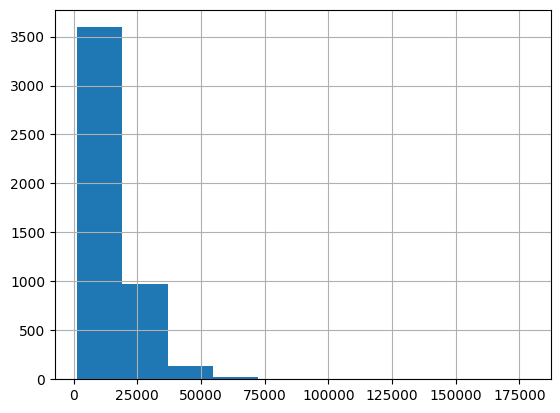

In [272]:
df_bmw8['precio'].hist()

In [273]:
df_bmw8['log_precio'] = np.log10(df_bmw8['precio'])

<AxesSubplot: >

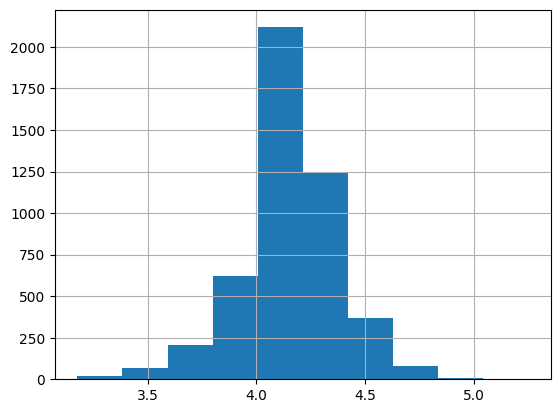

In [274]:
df_bmw8['log_precio'].hist()

### Hacemos la correlación para evaluar las variables, previa copia

In [275]:
df_bmw9 = df_bmw8.copy()

In [276]:
corr = df_bmw9.corr(numeric_only=True)

In [277]:
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,antiguedad,log_precio
km,1.000000,-0.031800,0.080246,0.054273,0.006678,0.065682,-0.022354,0.169907,-0.011606,-0.399674,0.313361,-0.447608
potencia,-0.031800,1.000000,0.325774,0.169529,0.313782,0.340435,0.188338,-0.001535,0.420984,0.643129,-0.041712,0.601770
volante_regulable,0.080246,0.325774,1.000000,0.280089,0.253900,0.272962,0.112995,0.235108,0.184156,0.256779,0.059701,0.249054
aire_acondicionado,0.054273,0.169529,0.280089,1.000000,0.139039,0.248393,0.107268,0.328503,0.165984,0.194281,-0.084397,0.270172
camara_trasera,0.006678,0.313782,0.253900,0.139039,1.000000,0.197050,0.118104,0.056622,0.162730,0.254625,0.019067,0.233762
elevalunas_electrico,0.065682,0.340435,0.272962,0.248393,0.197050,1.000000,0.213759,0.196355,0.293297,0.248866,-0.046134,0.332116
bluetooth,-0.022354,0.188338,0.112995,0.107268,0.118104,0.213759,1.000000,0.110688,0.080779,0.166814,-0.046051,0.181971
gps,0.169907,-0.001535,0.235108,0.328503,0.056622,0.196355,0.110688,1.000000,-0.066426,-0.033714,0.066381,-0.026084
alerta_lim_velocidad,-0.011606,0.420984,0.184156,0.165984,0.162730,0.293297,0.080779,-0.066426,1.000000,0.375791,-0.079183,0.415581
precio,-0.399674,0.643129,0.256779,0.194281,0.254625,0.248866,0.166814,-0.033714,0.375791,1.000000,-0.281188,0.889770


In [278]:
df_bmw9.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4727 entries, 0 to 4842
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4727 non-null   object 
 1   km                    4727 non-null   float64
 2   potencia              4727 non-null   float64
 3   combustible           4727 non-null   object 
 4   color                 4727 non-null   object 
 5   tipo_coche            4727 non-null   object 
 6   volante_regulable     4727 non-null   bool   
 7   aire_acondicionado    4727 non-null   bool   
 8   camara_trasera        4727 non-null   bool   
 9   elevalunas_electrico  4727 non-null   bool   
 10  bluetooth             4727 non-null   bool   
 11  gps                   4727 non-null   bool   
 12  alerta_lim_velocidad  4727 non-null   bool   
 13  precio                4727 non-null   float64
 14  antiguedad            4727 non-null   float64
 15  serie                 4727

### Separo mis Variables en 3 grupos(numéricas, booleanas, categóricas)

In [279]:
target=['precio']
def get_list_var(dataset):
    list_numbers=[]
    list_booleans=[]
    list_categories=[]

    for i in dataset:
      if (i not in target) and (dataset[i].dtype.kind == 'i' or dataset[i].dtype.kind == 'f') and (len(dataset[i].unique()) != 2):
        list_numbers.append(i)
      elif (i not in target) and (dataset[i].dtype.kind == 'b') and (len(dataset[i].unique())==2):
        list_booleans.append(i)
      elif (dataset[i].dtype.kind != 'o' and (i not in target)):
        list_categories.append(i)

    return list_numbers, list_booleans, list_categories

In [280]:
l_numericas, l_booleanos, l_categoricas = get_list_var(df_bmw9)

### Cambiaremos nuestras variables Booleanas a "0 y 1"

In [281]:
l_booleanos

['volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'elevalunas_electrico',
 'bluetooth',
 'gps',
 'alerta_lim_velocidad']

In [282]:
for i in l_booleanos:
 df_bmw9[i] = np.where(df_bmw9[i]==True, 1,0)

In [283]:
df_bmw9.head(1)

,modelo,km,potencia,combustible,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,antiguedad,serie,log_precio
0,118,140411.0,100.0,diesel,black,sin tipo,1,1,0,1,1,1,0,11300.0,5.920548,Serie 1,4.053078


###Hacemos un histograma de nuestras variables numéricas

In [284]:
l_numericas

['km', 'potencia', 'antiguedad', 'log_precio']

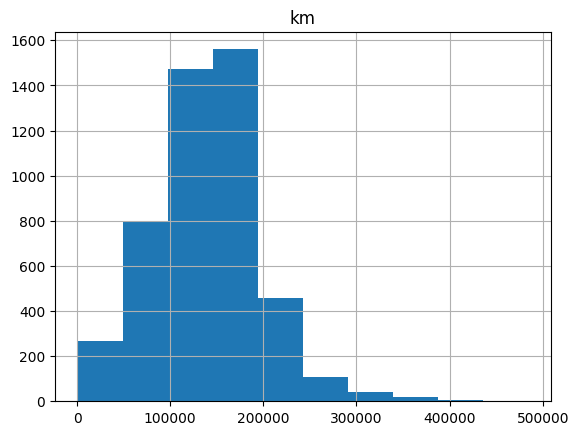

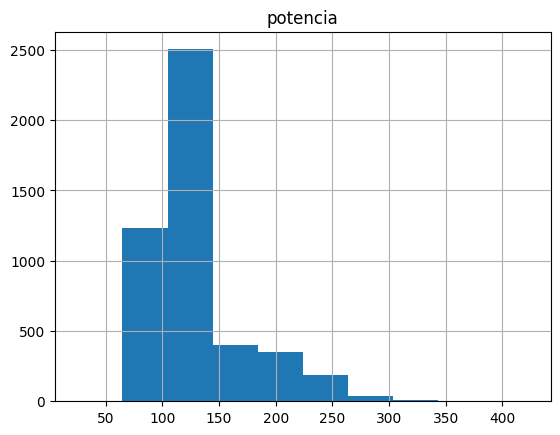

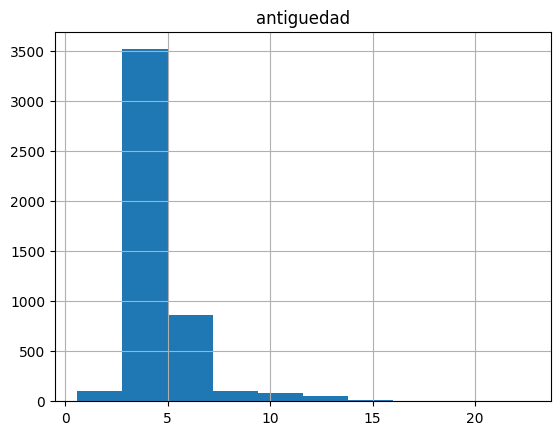

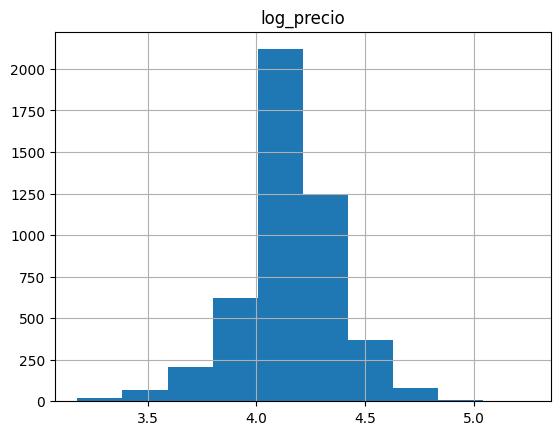

In [285]:
for i in l_numericas:
  df_bmw9.hist(i)

### Hacemos gráficos de relación para nuestras variables categóricas

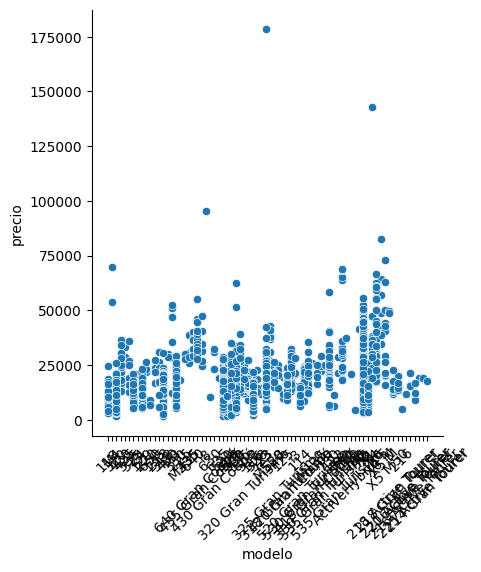

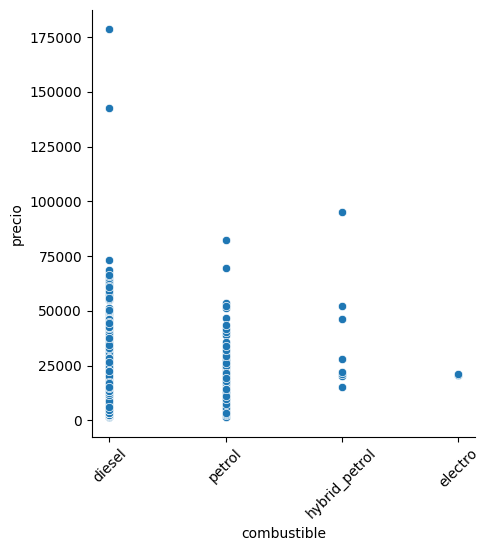

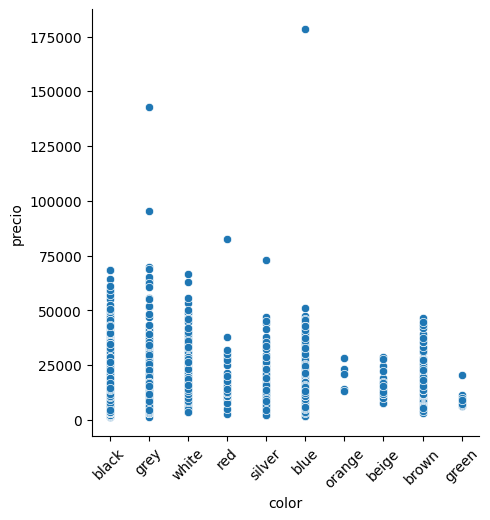

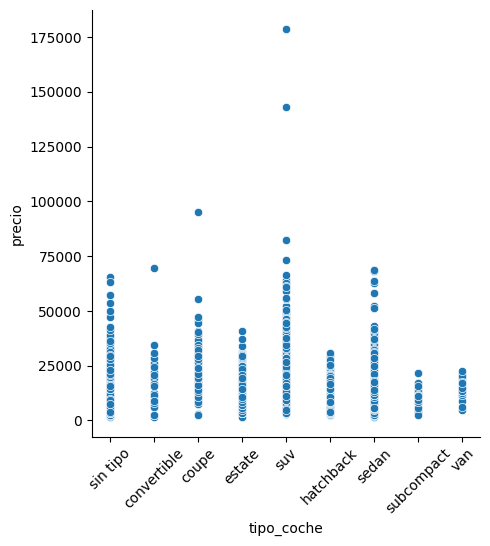

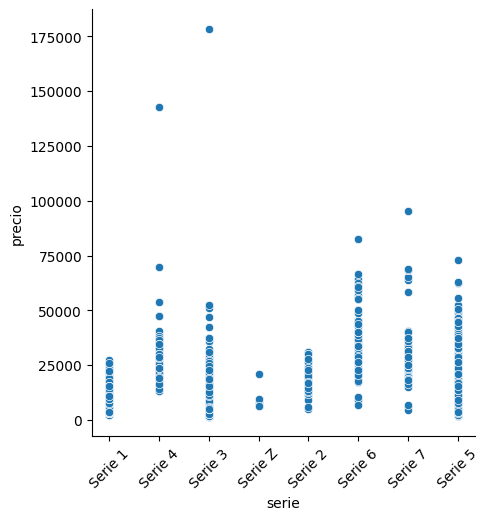

In [286]:
for i in l_categoricas:
  sns.relplot(data=df_bmw9, x=i, y="precio")
  plt.xticks(rotation=45)
plt.show()

In [287]:
#Observamos 2 outlaiers repetidos en nuestras gráficas, los revisamos a detalle
#df_bmw9[(df_bmw9['precio']>80000) & (df_bmw9['combustible']=='diesel')]
#Los eliminamos ya que no son coherentes precio y km
df_bmw9.drop(df_bmw9[(df_bmw9['precio']>80000) & (df_bmw9['combustible']=='diesel')].index, inplace=True)

In [288]:
df_bmw9.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4725 entries, 0 to 4842
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4725 non-null   object 
 1   km                    4725 non-null   float64
 2   potencia              4725 non-null   float64
 3   combustible           4725 non-null   object 
 4   color                 4725 non-null   object 
 5   tipo_coche            4725 non-null   object 
 6   volante_regulable     4725 non-null   int32  
 7   aire_acondicionado    4725 non-null   int32  
 8   camara_trasera        4725 non-null   int32  
 9   elevalunas_electrico  4725 non-null   int32  
 10  bluetooth             4725 non-null   int32  
 11  gps                   4725 non-null   int32  
 12  alerta_lim_velocidad  4725 non-null   int32  
 13  precio                4725 non-null   float64
 14  antiguedad            4725 non-null   float64
 15  serie                 4725

In [289]:
df_bmw9.head(1)

,modelo,km,potencia,combustible,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,antiguedad,serie,log_precio
0,118,140411.0,100.0,diesel,black,sin tipo,1,1,0,1,1,1,0,11300.0,5.920548,Serie 1,4.053078


In [290]:
df_bmw10= df_bmw9.copy()

In [291]:
df_bmw10['combustible'].value_counts()

combustible
diesel           4537
petrol            177
hybrid_petrol       8
electro             3
Name: count, dtype: int64

In [292]:
df_bmw10['color'].value_counts()

color
black     1904
grey      1053
blue       619
white      473
brown      302
silver     274
red         47
beige       37
green       10
orange       6
Name: count, dtype: int64

### Agrupamos color en "serie" y "personalizados", basandonos en que los de serie son los que habitalmente no te cobran como un extra y los personalizados son los colores diferentes a los de serie y por ende aplica un sobrecargo(lo cual nos da la pauta para darles valor diferente)

In [293]:
#Cambiamos los valores('black','white','red') a serie y los demás a personalizado
df_bmw10['group_color'] = np.where((df_bmw10['color'] =='black') | (df_bmw10['color'] =='white') | (df_bmw10['color'] =='red'), 'serie', 'personalizado')

In [294]:
df_bmw10['group_color'].value_counts()

group_color
serie            2424
personalizado    2301
Name: count, dtype: int64

### Para la variable combustible, color que lo agrupamos en group_color y la variable serie utilizo ordinalEncoder ya que le daré peso a mis items

In [295]:
oe = OrdinalEncoder(categories=[['petrol','diesel','hybrid_petrol','electro']])
oe

OrdinalEncoder(categories=[['petrol', 'diesel', 'hybrid_petrol', 'electro']])

In [296]:
df_bmw10['combustible_int'] = oe.fit_transform(df_bmw10[['combustible']])

In [297]:
oe = OrdinalEncoder(categories=[['serie','personalizado']])
oe

OrdinalEncoder(categories=[['serie', 'personalizado']])

In [298]:
df_bmw10['color_int'] = oe.fit_transform(df_bmw10[['group_color']])

In [299]:
oe = OrdinalEncoder(categories=[['Serie 1','Serie 2','Serie 3','Serie 4','Serie Z','Serie 5','Serie 6','Serie 7']])
oe

OrdinalEncoder(categories=[['Serie 1', 'Serie 2', 'Serie 3', 'Serie 4',
                            'Serie Z', 'Serie 5', 'Serie 6', 'Serie 7']])

In [300]:
df_bmw10['serie_int'] = oe.fit_transform(df_bmw10[['serie']])

In [301]:
df_bmw11 = df_bmw10.copy().reset_index()

In [302]:
df_bmw11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4725 entries, 0 to 4724
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4725 non-null   int64  
 1   modelo                4725 non-null   object 
 2   km                    4725 non-null   float64
 3   potencia              4725 non-null   float64
 4   combustible           4725 non-null   object 
 5   color                 4725 non-null   object 
 6   tipo_coche            4725 non-null   object 
 7   volante_regulable     4725 non-null   int32  
 8   aire_acondicionado    4725 non-null   int32  
 9   camara_trasera        4725 non-null   int32  
 10  elevalunas_electrico  4725 non-null   int32  
 11  bluetooth             4725 non-null   int32  
 12  gps                   4725 non-null   int32  
 13  alerta_lim_velocidad  4725 non-null   int32  
 14  precio                4725 non-null   float64
 15  antiguedad           

In [303]:
list_to_delete2 = ['modelo','color','combustible','group_color','serie','index']
for i in list_to_delete2:
  del(df_bmw11[i])

In [304]:
df_bmw11.head()

,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,antiguedad,log_precio,combustible_int,color_int,serie_int
0,140411.0,100.0,sin tipo,1,1,0,1,1,1,0,11300.0,5.920548,4.053078,1.0,0.0,0.0
1,13929.0,317.0,convertible,1,1,0,0,1,1,1,69700.0,4.002740,4.843233,0.0,1.0,3.0
2,183297.0,120.0,sin tipo,0,0,0,1,0,1,0,10200.0,5.841096,4.008600,1.0,0.0,2.0
3,128035.0,135.0,convertible,1,1,0,1,1,1,0,25100.0,4.002740,4.399674,1.0,0.0,3.0
4,97097.0,160.0,sin tipo,1,1,0,0,1,1,1,33400.0,4.002740,4.523746,1.0,1.0,3.0


### Para mi única varible categórica que queda **tipo_coche** utilizo _det_dummies_

In [305]:
df_bmw11=pd.get_dummies(data=df_bmw11, columns=['tipo_coche'],dtype=int)

In [306]:
df_bmw11.head(1)

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,...,serie_int,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_sin tipo,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van
0,140411.0,100.0,1,1,0,1,1,1,0,11300.0,...,0.0,0,0,0,0,0,1,0,0,0


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
pd.reset_option("max_columns")

### Ahora aplico el MinMaxScaler para que standarizar todos mis valores numéricos a la misma escala

In [307]:
minMaxResultado = MinMaxScaler()

In [308]:
l_numericas2, l_booleanos2, l_categoricas2 = get_list_var(df_bmw11)

In [309]:
l_numericas2.remove('log_precio')

In [310]:
l_numericas2

['km', 'potencia', 'antiguedad', 'combustible_int', 'serie_int']

In [311]:
df_bmw11[l_numericas2] = minMaxResultado.fit_transform(df_bmw11[l_numericas2])

In [312]:
df_bmw11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4725 entries, 0 to 4724
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   km                      4725 non-null   float64
 1   potencia                4725 non-null   float64
 2   volante_regulable       4725 non-null   int32  
 3   aire_acondicionado      4725 non-null   int32  
 4   camara_trasera          4725 non-null   int32  
 5   elevalunas_electrico    4725 non-null   int32  
 6   bluetooth               4725 non-null   int32  
 7   gps                     4725 non-null   int32  
 8   alerta_lim_velocidad    4725 non-null   int32  
 9   precio                  4725 non-null   float64
 10  antiguedad              4725 non-null   float64
 11  log_precio              4725 non-null   float64
 12  combustible_int         4725 non-null   float64
 13  color_int               4725 non-null   float64
 14  serie_int               4725 non-null   

In [313]:
corr = df_bmw11.corr(numeric_only=True)

In [314]:
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,antiguedad,log_precio,combustible_int,color_int,serie_int,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_sin tipo,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van
km,1.000000,-0.031734,0.080121,0.053871,0.007104,0.065620,-0.022577,0.169293,-0.011266,-0.417014,0.313497,-0.448038,0.037352,-0.002003,0.133980,-0.033415,-0.104709,0.143686,-0.077479,0.061522,0.037193,-0.031066,-0.104812,-0.095912
potencia,-0.031734,1.000000,0.325830,0.169643,0.313893,0.340478,0.188403,-0.001436,0.420981,0.680232,-0.041706,0.604327,-0.128857,-0.026277,0.591393,0.020529,0.150537,-0.042106,-0.202633,0.024041,-0.076537,-0.135344,0.230782,-0.057953
volante_regulable,0.080121,0.325830,1.000000,0.279704,0.254633,0.272656,0.113000,0.234568,0.184271,0.273929,0.059901,0.250665,0.009935,0.061125,0.422573,0.044558,0.067973,0.005538,-0.139202,0.055119,-0.051914,-0.092400,0.099058,-0.051166
aire_acondicionado,0.053871,0.169643,0.279704,1.000000,0.140072,0.248047,0.107139,0.327490,0.166386,0.212678,-0.084196,0.273330,0.067329,0.025740,0.281358,-0.034827,-0.007597,0.086943,-0.087129,0.058535,-0.025930,-0.103046,-0.010255,-0.004924
camara_trasera,0.007104,0.313893,0.254633,0.140072,1.000000,0.197686,0.118343,0.058371,0.162547,0.263603,0.018837,0.233393,-0.015471,0.001034,0.246538,-0.033713,0.057057,-0.031679,-0.043299,-0.017957,-0.027471,-0.043606,0.107850,-0.020952
elevalunas_electrico,0.065620,0.340478,0.272656,0.248047,0.197686,1.000000,0.213834,0.195884,0.293386,0.264257,-0.045966,0.333789,-0.022680,-0.068089,0.350764,-0.000170,0.118615,0.049612,-0.096922,0.011994,-0.020109,-0.099624,0.027198,-0.078467
bluetooth,-0.022577,0.188403,0.113000,0.107139,0.118343,0.213834,1.000000,0.110438,0.081017,0.180910,-0.046046,0.184048,-0.029372,-0.060439,0.037412,0.034936,0.092036,-0.004985,0.019901,-0.012208,-0.020462,-0.045521,-0.003684,-0.017164
gps,0.169293,-0.001436,0.234568,0.327490,0.058371,0.195884,0.110438,1.000000,-0.065856,-0.021165,0.066891,-0.022408,0.037101,0.027016,0.099616,-0.000970,-0.001408,0.059822,-0.004128,0.035852,0.020533,0.026462,-0.112419,-0.025984
alerta_lim_velocidad,-0.011266,0.420981,0.184271,0.166386,0.162547,0.293386,0.081017,-0.065856,1.000000,0.391872,-0.079216,0.415852,0.007294,-0.026165,0.379561,-0.013191,0.062904,-0.002498,-0.138366,0.034573,-0.039374,-0.103816,0.122430,-0.020772
precio,-0.417014,0.680232,0.273929,0.212678,0.263603,0.264257,0.180910,-0.021165,0.391872,1.000000,-0.298734,0.912889,0.037399,-0.053178,0.474410,0.007040,0.183292,-0.167199,-0.139236,0.006615,-0.105187,-0.092971,0.323428,-0.010858


### Exporto a solicitud del entregable, para su revisión

In [ ]:
df_bmw50 = df_bmw11.head(50)

In [ ]:
#Exportamos 50 primeros datos
file_name = "df_bmw50_export.xlsx"
df_bmw50.to_excel(file_name)